# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
rolls = [random.randint(1,6) for i in range(10)]
rolls

[2, 6, 6, 1, 6, 3, 1, 2, 1, 1]

#### 2.- Plot the results sorted by value.

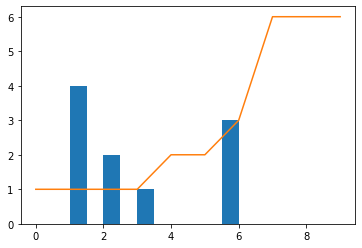

In [3]:
# your code here
x = sorted(rolls)
plt.hist(rolls)
plt.plot(x)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

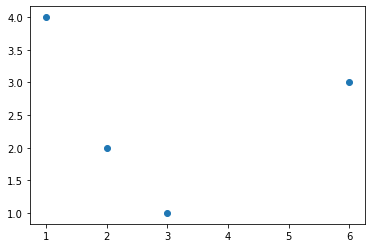

In [4]:
# your code here
freq = {i:rolls.count(i) for i in x}
x = [k for k in freq.keys()] 
y = [v for v in freq.values()]
#freq =  {i: rolls.count(i)/len(rolls) for i in set(x)}
plt.scatter(x, y)

In [5]:
"""
your comments here

You can just user histogram to check directly for the frequency distribution, or scatter.
In this case we can see that 6 was not rolled and 2 was the least roll, while 1, 3 and 5 were equally rolled.

"""

'\nyour comments here\n\nYou can just user histogram to check directly for the frequency distribution, or scatter.\nIn this case we can see that 6 was not rolled and 2 was the least roll, while 1, 3 and 5 were equally rolled.\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
def xmean(x):
    return sum(x)/len(x)
xmean(rolls)

2.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def freq(x):
    f = {i: rolls.count(i) for i in set(x)}
    return sum([k*v for k, v in f.items()])/len(x)

freq(rolls) 

2.9

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
# your code here
def xmed(x):
    r = sorted(x)
    i = int(len(x)/2)-1
    if i%2==0:
        return (r[i]+r[i+1])/2
    else:
        return r[i]

xmed(rolls)

2.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
# your code here
def quart(x):
    r = sorted(x)
    i = int(len(x)/4)
    q1 = r[i]
    q2 = xmed(x)
    q3 = r[(i*3)+1]
    q4 = r[-1]
    return [q1, q2, q3, q4]

quart(rolls)

[1, 2.0, 6, 6]

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

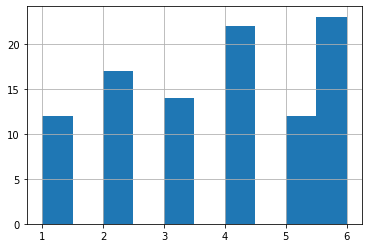

In [10]:
# your code here
data = pd.read_csv('../data/roll_the_dice_hundred.csv')
x = data.sort_values(by='value',ascending=False)
x['value'].hist()


In [11]:
"""
your comments here

6 was rolled the most, followed by 4
5 was rolled the least
"""

'\nyour comments here\n\n6 was rolled the most, followed by 4\n5 was rolled the least\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [12]:
# your code here
xmean(data['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [13]:
# your code here
x['value'].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

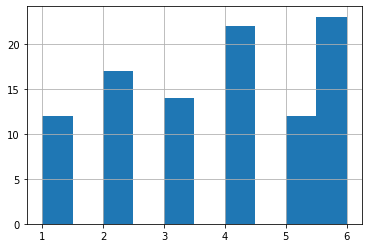

In [14]:
# your code here
x['value'].hist()

In [15]:
"""
your comments here

The mean value calculated was 3.7, around the median
The numbers also makes sense, since there were more 4 and 6 but less 5,
while on the the first have, there was more 2 but less 1 and 3.
"""

'\nyour comments here\n\nThe mean value calculated was 3.7, around the median\nThe numbers also makes sense, since there were more 4 and 6 but less 5,\nwhile on the the first have, there was more 2 but less 1 and 3.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

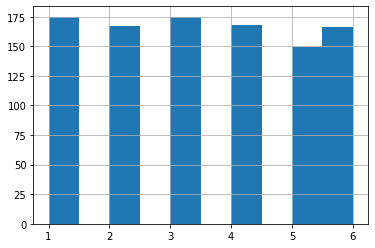

In [16]:
# your code here
data = pd.read_csv('../data/roll_the_dice_thousand.csv')
s = data['value'].sort_values()
s.hist()

In [17]:
"""
your comments here
The values are more evenly distribution, probably because there was a higher number of throws.
Since the probability of rolling a number is the same for all (1/6), the more data, closer
to the probability (1/6) the result will be.
"""

'\nyour comments here\nThe values are more evenly distribution, probably because there was a higher number of throws.\nSince the probability of rolling a number is the same for all (1/6), the more data, closer\nto the probability (1/6) the result will be.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([ 1., 28., 37., 45., 82.])

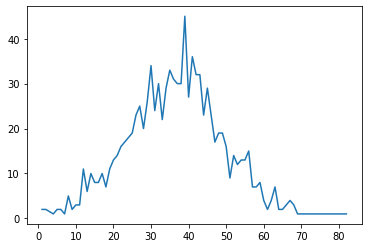

In [18]:
# your code here
data = pd.read_csv('../data/ages_population.csv')
df = sorted(list(data['observation']))
f = {i:df.count(i) for i in df}
x = [k for k in f.keys()]
y = [v for v in f.values()]
plt.plot(x,y)
np.quantile(data,[0,.25,.50,.75,1])

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [19]:
print(np.mean(df))
print(np.std(df))

36.56
12.810089773299797


In [20]:
"""
your comments here

Since the plot is simmetrical, the mean will be around the median,
which will be near the 'curve' of the plot.
The standard deviation is associated with the distance to the mean (dipersion),
so, in this simmetric case, it wil be around the first and third quartile.

"""

"\nyour comments here\n\nSince the plot is simmetrical, the mean will be around the median,\nwhich will be near the 'curve' of the plot.\nThe standard deviation is associated with the distance to the mean (dipersion),\nso, in this simmetric case, it wil be around the first and third quartile.\n\n"

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

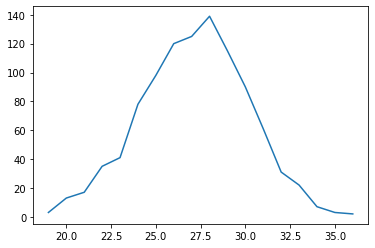

In [36]:
# your code here
data = pd.read_csv('../data/ages_population2.csv')
df = sorted(list(data['observation']))
f = {i:df.count(i) for i in df}
x = [k for k in f.keys()]
y = [v for v in f.values()]
plt.plot(x,y)


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [22]:
"""
your comments here
The distribution is 'smoother', so the population for each age increases more constantly and then
decreases more constantly.
"""

"\nyour comments here\nThe distribution is 'smoother', so the population for each age increases more constantly and then\ndecreases more constantly.\n"

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [23]:
# your code here
print(np.mean(df))
print(np.std(df))

27.155
2.9683286543103677


In [24]:
"""
your comments here
The mean and std are about the same, meaning that the minor shifts inside the data are
'absorved' by the greater count.
"""

"\nyour comments here\nThe mean and std are about the same, meaning that the minor shifts inside the data are\n'absorved' by the greater count.\n"

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

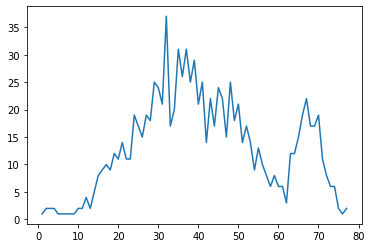

In [35]:
# your code here
data1 = pd.read_csv('../data/ages_population3.csv')
df = sorted(list(data1['observation']))
f = {i:df.count(i) for i in df}
x = [k for k in f.keys()]
y = [v for v in f.values()]
plt.plot(x,y)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [26]:
# your code here
print(np.mean(data))
print(np.std(data))

observation    41.989
dtype: float64
observation    16.136632
dtype: float64


In [27]:
"""
your comments here
In this case the graph is more even in some ages, with a few more people around 70,
so the mean increased a little. Also, the plot is more spread out, pointing that the std
would increase a little.
"""

'\nyour comments here\nIn this case the graph is more even in some ages, with a few more people around 70,\nso the mean increased a little. Also, the plot is more spread out, pointing that the std\nwould increase a little.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [28]:
# your code here
np.quantile(data,[0,.25,.50,.75,1])

array([ 1., 30., 40., 53., 77.])

In [29]:
"""
your comments here
The median and the mean are really close, but increased comparing to the first plot.
As the std increased, so did the distance of each quartile to the mean.
"""

'\nyour comments here\nThe median and the mean are really close, but increased comparing to the first plot.\nAs the std increased, so did the distance of each quartile to the mean.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [37]:
# your code here
np.quantile(data,[.25,.50,.75])
#percentiles from the first age dataset

array([25., 27., 29.])

In [31]:
"""
your comments here

The percentiles from the first dataset comparing to the current dataset,
demonstrates that the median directly influences the quartiles, relating
to the standard deviation and mean, also on the distribution of the data
on the plot.

"""


'\nyour comments here\n\nThese percentiles represents the mean and two standard deviations (one to the left,\none to the right). It is usefull because we know that about 68% of the population\nwill be inserted in that range.\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [32]:
# your code here

In [33]:
"""
your comments here
"""

'\nyour comments here\n'